__<font size="5">PHASE 1 PROJECT</font>__ 

__<font size="5">Aviation Risk Assessment Analysis</font>__ 

__<span style="font-size: 18px;">Overview</span>__

The company had planned to diversify its portfolio by entering the aviation industry, aiming to acquire and operate aircraft for both commercial and private use.
Initially lacking knowledge about potential aircraft risks, a comprehensive risk assessment had been conducted to determine which aircraft had posed the lowest operational risks for the new business venture.

***<span style="font-size: 18px;">1. Importing Libraries</span>***

In [281]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile

***<span style="font-size: 18px;">2. Loading the Data</span>***


- Get the zip path. Extract the contents.

In [282]:
zip_path = "AviationData.csv.zip"

# Extract contents
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("unzipped_folder")

- Load the extracted dataset 

In [283]:
aviation_data = pd.read_csv("unzipped_folder/AviationData.csv", encoding='ISO-8859-1', low_memory=False)

- Viewing the first 10 rows

In [284]:
aviation_data.head(0)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date


***<span style="font-size: 18px;">3. Cleaning Data Types </span>***


- Ensuring data types are in correct form


In [285]:
def fix_types(aviation_data):
    for col in aviation_data.columns:
        # Fix dates
        if 'date' in col.lower():
            aviation_data[col] = pd.to_datetime(aviation_data[col], errors='ignore')
        
        # Fix numbers
        elif any(word in col.lower() for word in ['total', 'number', 'id', 'injuries', 'engines']):
            aviation_data[col] = pd.to_numeric(aviation_data[col], errors='ignore')
    
    return aviation_data

***<span style="font-size: 18px;">4. Missing values </span>***


- checking number of rows and columns before handling them

In [287]:
aviation_data.shape

(88889, 31)

- Using .isnull().sum() to check numer of missing values

In [288]:
missing_values = aviation_data.isnull().sum()

- Checking missing values by columns using a horizontal bar chart

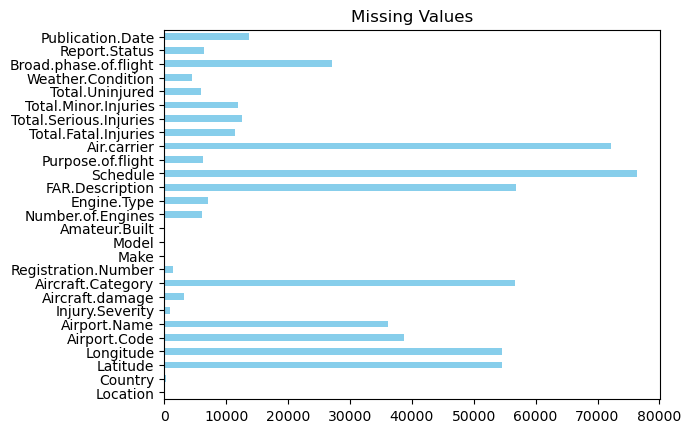

In [289]:
if missing_values.sum() > 0:
    missing_values[missing_values > 0].plot(kind='barh', color='skyblue')
    plt.title('Missing Values')
    plt.show()
else:
    print("No missing values!")

- Handling the missing values
- Data previously has 88889 rows 31 columns 

In [290]:
if aviation_data.isnull().values.any():
    # Drops columns with more than 50% missing values
    aviation_data = aviation_data.dropna(axis=1, thresh=len(aviation_data) * 0.5)

    # Fills text columns with 'Unknown' instead
    for col in aviation_data.select_dtypes('object'):
        aviation_data[col].fillna('Unknown', inplace=True)

    # Drops rows missing 'Event.Date'
    aviation_data = aviation_data.dropna(subset=['Event.Date'])

    print("Missing values handled successfully!")
else:
    print("No missing values found!")


Missing values handled successfully!


- Checking no of rows and columns after they've been handled


In [291]:
aviation_data.shape

(88889, 25)

- Checking the column names

In [292]:
aviation_data.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Airport.Code', 'Airport.Name',
       'Injury.Severity', 'Aircraft.damage', 'Registration.Number', 'Make',
       'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date'],
      dtype='object')

***<span style="font-size: 18px;">5. Duplicates </span>***


- Checking for duplicates

In [293]:
aviation_data.duplicated().sum()

0

- Handling duplicates

In [294]:
aviation_data = aviation_data.drop_duplicates(subset=['Event.Id'])
aviation_data

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Unknown,Unknown,Fatal(2),Destroyed,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,Unknown
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Unknown,Unknown,Fatal(4),Destroyed,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Unknown,Unknown,Fatal(3),Destroyed,...,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Unknown,Unknown,Fatal(2),Destroyed,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Unknown,Unknown,Fatal(1),Destroyed,...,Unknown,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Unknown,Unknown,Minor,Unknown,...,Unknown,Personal,0.0,1.0,0.0,0.0,Unknown,Unknown,Unknown,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,Unknown,Unknown,Unknown,Unknown,...,Unknown,Unknown,0.0,0.0,0.0,0.0,Unknown,Unknown,Unknown,Unknown
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,PAN,PAYSON,Non-Fatal,Substantial,...,Unknown,Personal,0.0,0.0,0.0,1.0,VMC,Unknown,Unknown,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,Unknown,Unknown,Unknown,Unknown,...,Unknown,Personal,0.0,0.0,0.0,0.0,Unknown,Unknown,Unknown,Unknown


***<span style="font-size: 18px;">8. Outliers </span>***

- Statistical summaries. 

In [296]:
aviation_data.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,81924.000000,76684.000000,75629.000000,76191.000000,82088.000000
mean,1.144622,0.633587,0.280554,0.356013,5.086639
std,0.443127,5.303900,1.549688,2.238239,26.635398
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


- Checking for outliars

In [297]:
def find_outliers(column):
    Q1 = aviation_data[column].quantile(0.25)
    Q3 = aviation_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = aviation_data[(aviation_data[column] < lower) | (aviation_data[column] > upper)]
    print(f"{column}: {len(outliers)} outliers")
    return outliers

In [298]:
numeric_cols = aviation_data.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    find_outliers(col)

Number.of.Engines: 12968 outliers
Total.Fatal.Injuries: 17527 outliers
Total.Serious.Injuries: 12991 outliers
Total.Minor.Injuries: 15356 outliers
Total.Uninjured: 3969 outliers


- Visualizing outliars by plotting a histogram

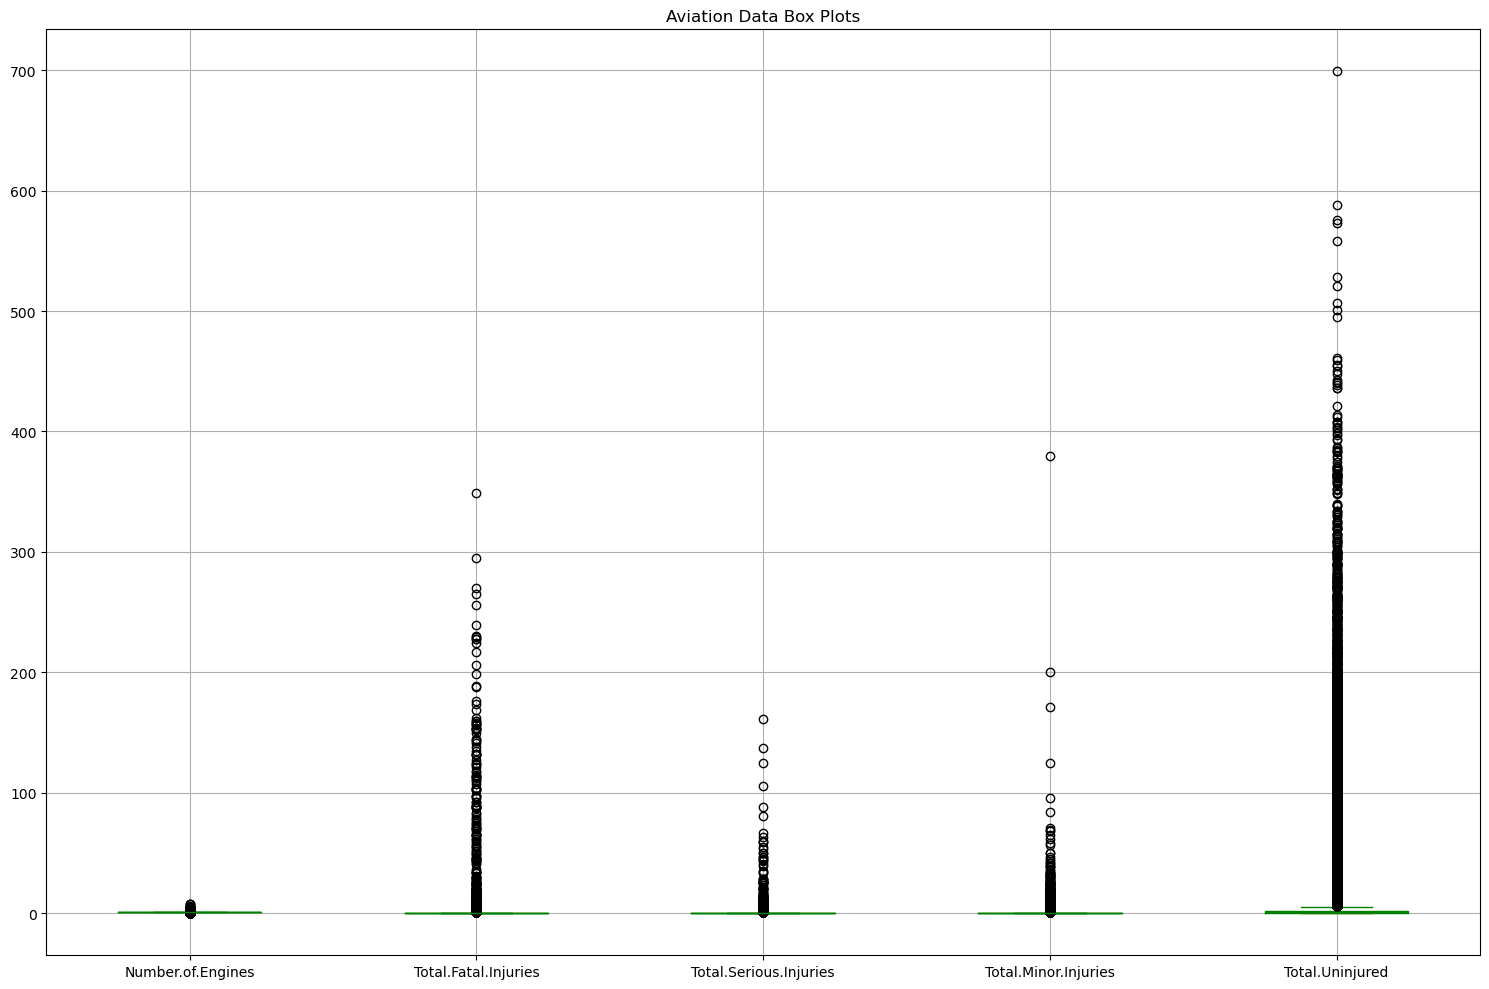

In [299]:
aviation_data.boxplot(figsize=(15, 10), vert=True, color='green')
plt.title('Aviation Data Box Plots')
plt.tight_layout()
plt.show()

***<span style="font-size: 18px;">9. Standardizing columns</span>***

In [309]:
aviation_data.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Airport.Code', 'Airport.Name',
       'Injury.Severity', 'Aircraft.damage', 'Registration.Number', 'Make',
       'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date'],
      dtype='object')

- Standardizing the Country column


In [300]:
aviation_data['Country'] = aviation_data['Country'].replace({'US': 'USA', 'United States': 'USA'})
aviation_data['Country']

0        USA
1        USA
2        USA
3        USA
4        USA
        ... 
88884    USA
88885    USA
88886    USA
88887    USA
88888    USA
Name: Country, Length: 87951, dtype: object

- Standardizing Amateur Built column


In [301]:
aviation_data['Amateur.Built'] = aviation_data['Amateur.Built'].replace({'Y': 'Yes', 'N': 'No', 'UNK': 'Unknown'})
aviation_data['Amateur.Built']

0        No
1        No
2        No
3        No
4        No
         ..
88884    No
88885    No
88886    No
88887    No
88888    No
Name: Amateur.Built, Length: 87951, dtype: object

In [311]:
aviation_data['Weather.Condition'] = aviation_data['Weather.Condition'].replace({'Unk': 'UNK', 'Unknown': 'UNK'})
aviation_data['Weather.Condition']

0        UNK
1        UNK
2        IMC
3        IMC
4        VMC
        ... 
88884    UNK
88885    UNK
88886    VMC
88887    UNK
88888    UNK
Name: Weather.Condition, Length: 87951, dtype: object

***<span style="font-size: 18px;">10. Plotting charts</span>***

-  Plotting aircraft damage types

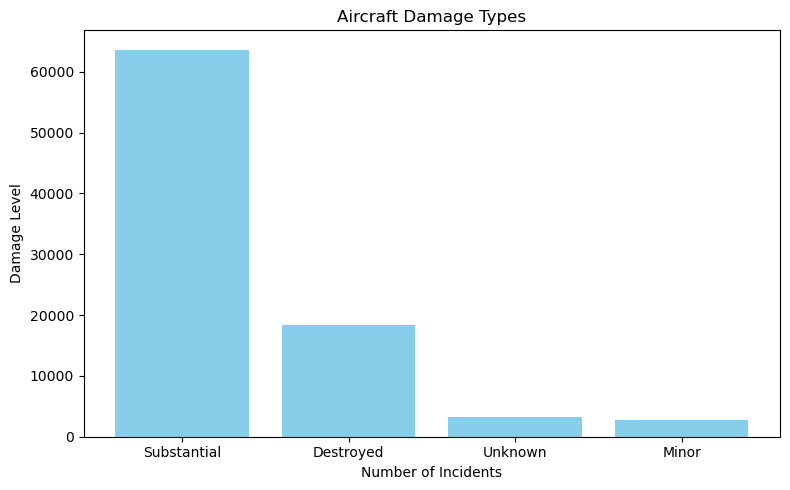

In [316]:
damage_counts = aviation_data['Aircraft.damage'].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(damage_counts.index, damage_counts.values, color='skyblue')
plt.title('Aircraft Damage Types')
plt.xlabel('Number of Incidents')
plt.ylabel('Damage Level')
plt.tight_layout()
plt.show()

- Plotting the distribution of weather conditions

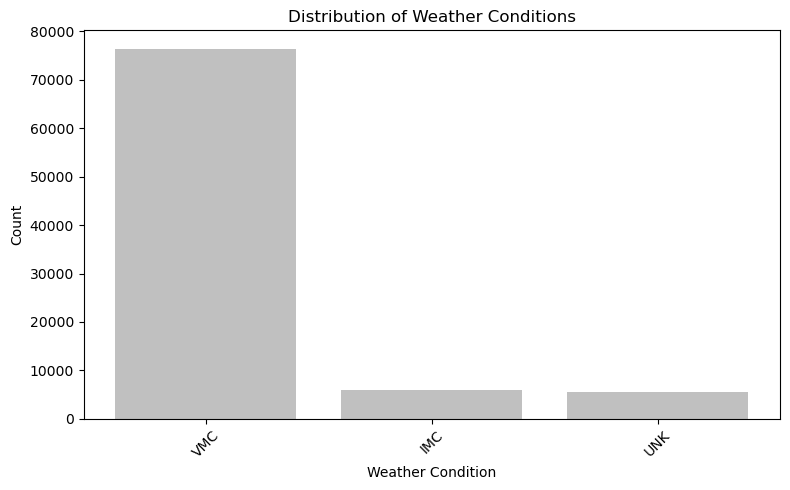

In [317]:
weather_counts = aviation_data['Weather.Condition'].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(weather_counts.index, weather_counts.values, color='silver')
plt.title('Distribution of Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Plotting the engine type distribution

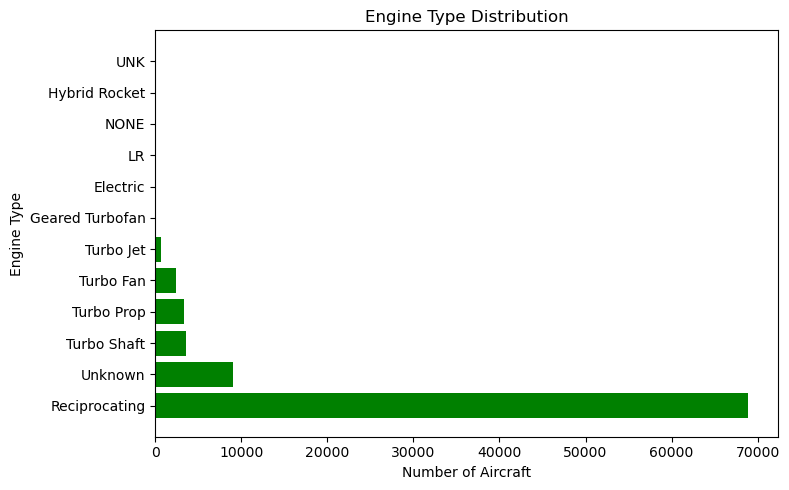

In [318]:
engine_counts = aviation_data['Engine.Type'].value_counts()

plt.figure(figsize=(8, 5))
plt.barh(engine_counts.index, engine_counts.values, color='green')
plt.title('Engine Type Distribution')
plt.xlabel('Number of Aircraft')
plt.ylabel('Engine Type')
plt.tight_layout()
plt.show()

***<span style="font-size: 18px;">11. Checking and saving the cleaned data</span>***


In [314]:
aviation_data.shape


(87951, 25)

- Saving the data


In [319]:
aviation_data.to_csv('cleaned_aviation_data.csv', index=False)
print("Cleaned data saved!")

Cleaned data saved!
